In [13]:
from google.colab import files

# Upload file dari laptop
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory (1).csv


In [14]:
import pandas as pd

# Baca file csv
df = pd.read_csv("weatherHistory.csv")

# Tampilkan 5 baris pertama
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [15]:
# Info tentang dataset
df.info()

# Statistik dasar (mean, max, min, dll)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


/tmp/ipython-input-321886383.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_temp = df.groupby(df['Formatted Date'].dt.to_period("M"))['Temperature (C)'].mean()


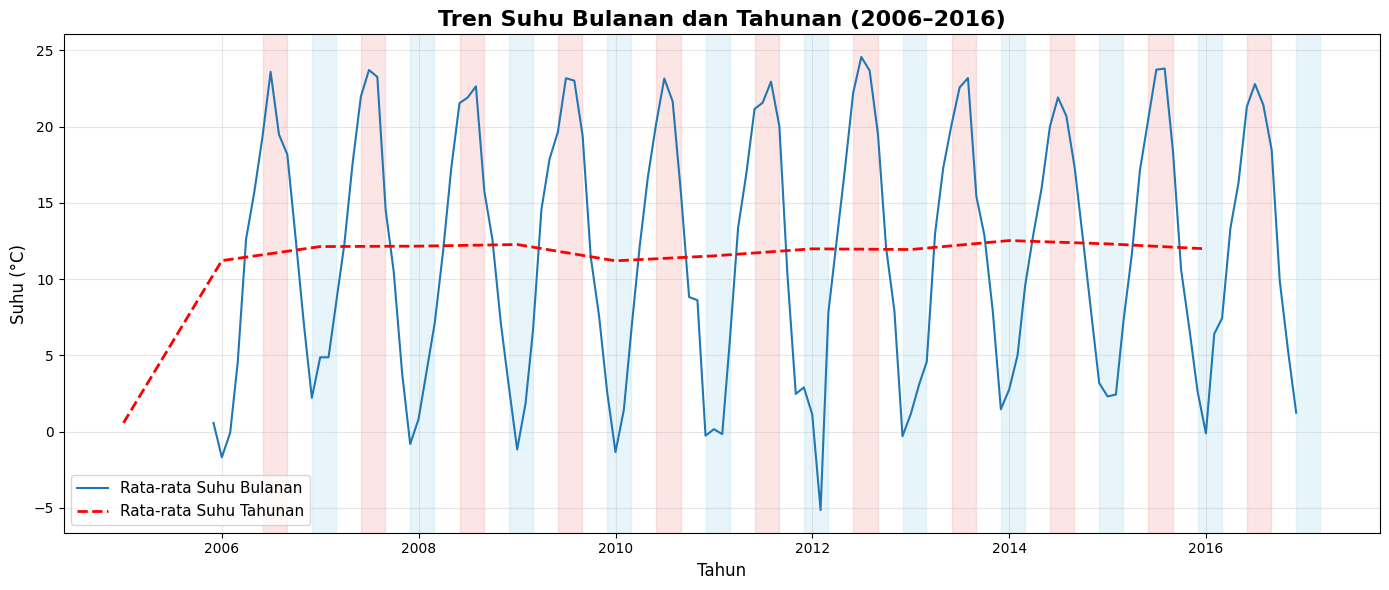

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Tanggal dalam datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Hitung rata-rata bulanan
monthly_temp = df.groupby(df['Formatted Date'].dt.to_period("M"))['Temperature (C)'].mean()
monthly_temp.index = monthly_temp.index.to_timestamp()

# Hitung rata-rata tahunan
yearly_temp = df.groupby(df['Formatted Date'].dt.year)['Temperature (C)'].mean()
yearly_temp.index = pd.to_datetime(yearly_temp.index.astype(str) + "-01-01")

# Plot
plt.figure(figsize=(14,6))

# Garis bulanan
plt.plot(monthly_temp.index, monthly_temp.values, color="tab:blue", linewidth=1.5, label="Rata-rata Suhu Bulanan")

# Garis tahunan
plt.plot(yearly_temp.index, yearly_temp.values, color="red", linestyle="--", linewidth=2, label="Rata-rata Suhu Tahunan")

# Tambahkan shading untuk musim dingin & panas
for year in range(2006, 2017):
    # Musim dingin (Des–Feb)
    plt.axvspan(pd.Timestamp(f"{year}-12-01"), pd.Timestamp(f"{year+1}-02-28"), color="skyblue", alpha=0.2)
    # Musim panas (Jun–Aug)
    plt.axvspan(pd.Timestamp(f"{year}-06-01"), pd.Timestamp(f"{year}-08-31"), color="lightcoral", alpha=0.2)

# Tampilan
plt.title("Tren Suhu Bulanan dan Tahunan (2006–2016)", fontsize=16, fontweight="bold")
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Suhu (°C)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

In [17]:
# Fungsi klasifikasi cuaca
def classify_weather(row):
    if row['Precip Type'] == 'rain':
        return "Hujan"
    elif row['Precip Type'] == 'snow':
        return "Salju"
    elif row['Temperature (C)'] > 25:
        return "Panas"
    else:
        return "Cerah"

# Tambahkan kolom baru
df['Weather Category'] = df.apply(classify_weather, axis=1)

# Lihat hasil kategori
df[['Formatted Date','Temperature (C)','Precip Type','Weather Category']].head(10)

,Formatted Date,Temperature (C),Precip Type,Weather Category
0,2006-03-31 22:00:00+00:00,9.472222,rain,Hujan
1,2006-03-31 23:00:00+00:00,9.355556,rain,Hujan
2,2006-04-01 00:00:00+00:00,9.377778,rain,Hujan
3,2006-04-01 01:00:00+00:00,8.288889,rain,Hujan
4,2006-04-01 02:00:00+00:00,8.755556,rain,Hujan
5,2006-04-01 03:00:00+00:00,9.222222,rain,Hujan
6,2006-04-01 04:00:00+00:00,7.733333,rain,Hujan
7,2006-04-01 05:00:00+00:00,8.772222,rain,Hujan
8,2006-04-01 06:00:00+00:00,10.822222,rain,Hujan
9,2006-04-01 07:00:00+00:00,13.772222,rain,Hujan


In [18]:
# Hitung jumlah tiap kategori
category_counts = df['Weather Category'].value_counts()
print(category_counts)

Weather Category
Hujan    85224
Salju    10712
Cerah      516
Panas        1
Name: count, dtype: int64


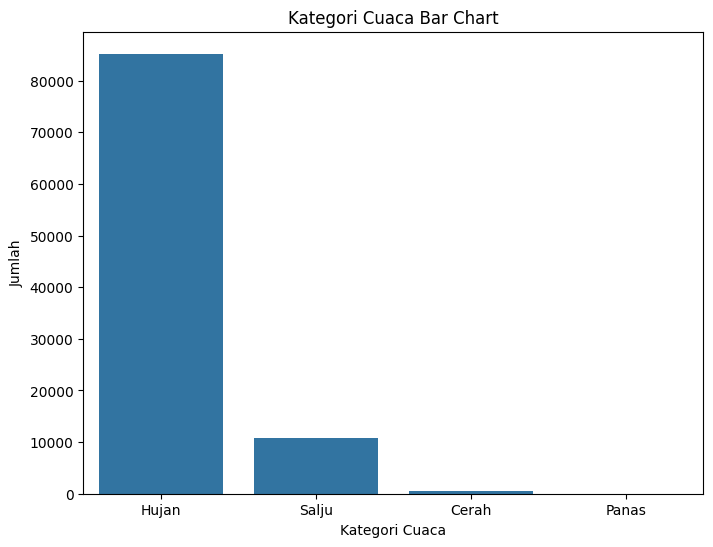

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat Bar Chart
plt.figure(figsize=(8,6))
sns.countplot(x='Weather Category', data=df, order=df['Weather Category'].value_counts().index)
plt.title("Kategori Cuaca Bar Chart")
plt.ylabel("Jumlah")
plt.xlabel("Kategori Cuaca")
plt.show()

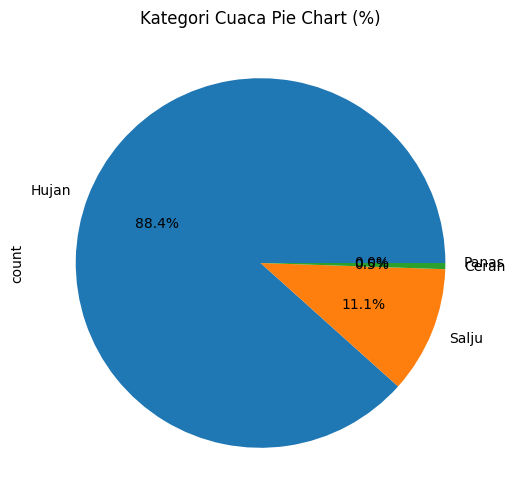

In [20]:
# Buat Pie Chart
df['Weather Category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Kategori Cuaca Pie Chart (%)")
plt.show()

In [21]:
# Rata-rata suhu per tahun
yearly_temp = df.groupby(df['Formatted Date'].dt.year)['Temperature (C)'].mean()
print(yearly_temp)

Formatted Date
2005     0.577778
2006    11.215225
2007    12.134677
2008    12.161819
2009    12.269682
2010    11.200176
2011    11.524934
2012    11.986824
2013    11.941017
2014    12.528228
2015    12.312088
2016    11.987381
Name: Temperature (C), dtype: float64


In [22]:
# Install library yang diperlukan
!pip install replicate python-dotenv

import os
from replicate.client import Client
from dotenv import load_dotenv

# === Mount Google Drive untuk akses file .env ===
from google.colab import drive
drive.mount('/content/drive')

# === Arahkan ke folder tempat file .env disimpan ===
env_path = "/content/drive/MyDrive/weather-capstone/.env"

# Load .env
load_dotenv(env_path)

# Ambil token dari .env
api_token = os.getenv("REPLICATE_API_TOKEN")

# Jika tidak ada di .env, fallback ke input manual
if not api_token:
    api_token = input("Masukkan API Token Replicate Anda: ")

if not api_token:
    raise ValueError("API token Replicate tidak ditemukan! Pastikan file .env sudah benar atau masukkan manual.")

# Buat client Replicate
replicate = Client(
    api_token=api_token,
    headers={"User-Agent": "replicate-google-colab-example/1.0"}
)

# === Prompt ke model ===
output = replicate.run(
    "meta/meta-llama-3-70b-instruct",
    input={
        "prompt": (
            "Saya memiliki data cuaca tahunan dengan suhu rata-rata setiap tahun. "
            "Tolong buat ringkasan singkat dalam 3 kalimat tentang tren suhu tahunan ini "
            "dengan menggunakan bahasa Indonesia:\n" + str(yearly_temp)
        )
    }
)

# Cetak hasil
print("".join(output))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Berikut adalah ringkasan singkat tentang tren suhu tahunan:

Suhu rata-rata tahunan menunjukkan kenaikan secara umum dari tahun 2005 hingga 2016, dengan beberapa tahun mengalami penurunan suhu. Pada tahun 2009 dan 2014, suhu rata-rata mencapai puncaknya, yaitu sekitar 12,27°C dan 12,53°C. Secara keseluruhan, suhu rata-rata tahunan meningkat sekitar 11,64°C pada tahun 2006 menjadi sekitar 12,31°C pada tahun 2015.


In [23]:
# Install library yang diperlukan
!pip install replicate python-dotenv

import os
from replicate.client import Client
from dotenv import load_dotenv

# === Mount Google Drive untuk akses file .env ===
from google.colab import drive
drive.mount('/content/drive')

# === Arahkan ke folder tempat file .env disimpan ===
env_path = "/content/drive/MyDrive/weather-capstone/.env"

# Load .env
load_dotenv(env_path)

# Ambil token dari .env
api_token = os.getenv("REPLICATE_API_TOKEN")

# Jika tidak ada di .env, fallback ke input manual
if not api_token:
    api_token = input("Masukkan API Token Replicate Anda: ")

if not api_token:
    raise ValueError("API token Replicate tidak ditemukan! Pastikan file .env sudah benar atau masukkan manual.")

# Buat client Replicate
replicate = Client(
    api_token=api_token,
    headers={"User-Agent": "replicate-google-colab-example/1.0"}
)

# === Prompt 1: Ringkasan Tren ===
prompt_trend = (
    "Saya memiliki data suhu tahunan berikut:\n"
    + str(yearly_temp)
    + "\n\n"
    "Tolong buat ringkasan singkat dalam 3 kalimat tentang tren suhu tahunan ini. "
    "Gunakan bahasa Indonesia."
)

# === Prompt 2: Insight Utama ===
prompt_insight = (
    "Berikut adalah data suhu tahunan:\n"
    + str(yearly_temp)
    + "\n\n"
    "Jelaskan 3 insight utama dari data ini, misalnya tahun terpanas, "
    "tren kenaikan atau penurunan, dan kestabilan suhu. Gunakan bahasa Indonesia."
)

# === Prompt 3: Rekomendasi ===
prompt_recommendation = (
    "Berdasarkan data suhu tahunan berikut:\n"
    + str(yearly_temp)
    + "\n\n"
    "Berikan 2 rekomendasi singkat terkait dampak perubahan suhu ini "
    "untuk lingkungan, kesehatan, atau pertanian. Gunakan bahasa Indonesia."
)

# === Prompt 4: Testing ===
prompt_test = (
    "Berikut adalah data suhu harian:\n"
    + str(df['Temperature (C)'].tolist()[:200])  # ambil 200 data biar tidak overload
    + "\n\n"
    "Berdasarkan data di atas, sebutkan suhu tertinggi dan terendah yang ada. "
    "Gunakan bahasa Indonesia."
)

# === Jalankan semua prompt ===
for title, prompt in [
    ("Ringkasan Tren", prompt_trend),
    ("Insight Utama", prompt_insight),
    ("Rekomendasi", prompt_recommendation),
    ("Testing", prompt_test),
]:
    print("="*40)
    print(title)
    print("="*40)
    output = replicate.run(
        "meta/meta-llama-3-70b-instruct",
        input={"prompt": prompt}
    )
    print("".join(output))
    print("\n")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ringkasan Tren


Berikut adalah ringkasan singkat tentang tren suhu tahunan:

Tren suhu tahunan menunjukkan kenaikan secara umum dari tahun 2005 hingga 2015, dengan beberapa fluktuasi kecil. Pada tahun 2016, suhu mengalami penurunan sedikit. Secara keseluruhan, suhu tahunan cenderung meningkat seiring waktu.


Insight Utama


Berikut adalah 3 insight utama dari data suhu tahunan tersebut:

1. **Tahun terpanas**: Berdasarkan data, tahun 2014 adalah tahun terpanas dengan suhu rata-rata 12,53°C. Hal ini menunjukkan bahwa tahun 2014 mengalami kenaikan suhu yang cukup signifikan dibandingkan dengan tahun-tahun lainnya.

2. **Tren kenaikan suhu**: Secara umum, data menunjukkan adanya tren kenaikan suhu tahunan. Meskipun terdapat beberapa tahun dengan penurunan suhu, seperti tahun 2010 dan 2016, namun secara keseluruhan suhu tahunan cenderung meningkat. Hal ini dapa

In [ ]:
# Menampilkan suhu tertinggi dan terendah di dataset WeatherHistory
print("Suhu maksimum di dataset:", df['Temperature (C)'].max())
print("Suhu minimum di dataset:", df['Temperature (C)'].min())
